In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step1: Read Dataset

In [4]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Step 2 : Perform Basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Step 3: Separate X(RND) and Y(PROFIT)

In [8]:
X = df[['RND']]
Y = df[['PROFIT']]

In [9]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

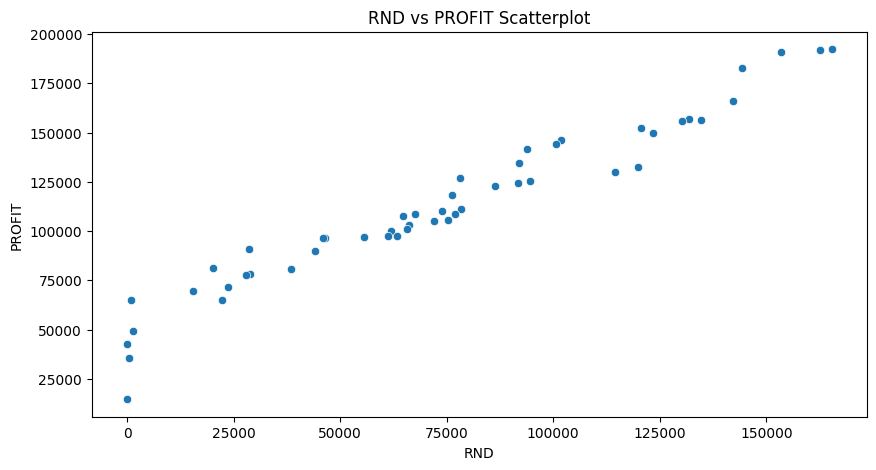

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='RND',y='PROFIT')
plt.title('RND vs PROFIT Scatterplot')
plt.show()

Step 4: Build the Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In a jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render,please try loading this page with nbviewer.org.

In [14]:
model.intercept_

array([49032.89914125])

In [15]:
model.coef_

array([[0.85429137]])

PROFIT_pred = 0.8542*RND + 49032.90

Step 5 : Evaluate the Model

In [16]:
# R2 score
model.score(X,Y)

0.9465353160804393

In [17]:
# Estimated values for Profit
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f'Mean Squared Error (MSE) : {mse:.2f}')

Mean Squared Error (MSE) : 85120931.33


In [21]:
rmse = mse**(1/2)
print(f'Root Mean Squared Error : {rmse:.2f}')

Root Mean Squared Error : 9226.10


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,ypred)
print(f'Mean Absolute Error (MAE) : {mae:.2f}')

Mean Absolute Error (MAE) : 6910.98


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f'Mean Absolute Percentage Error (MAPE) : {mape*100:.2f} %')

Mean Absolute Percentage Error (MAPE) : 11.07 %


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
print(f'R2 score : {r2:.4f}')

R2 score : 0.9465


Because R2 score is 0.9465 > 0.8 it is very good model

Visualizing straight line fit

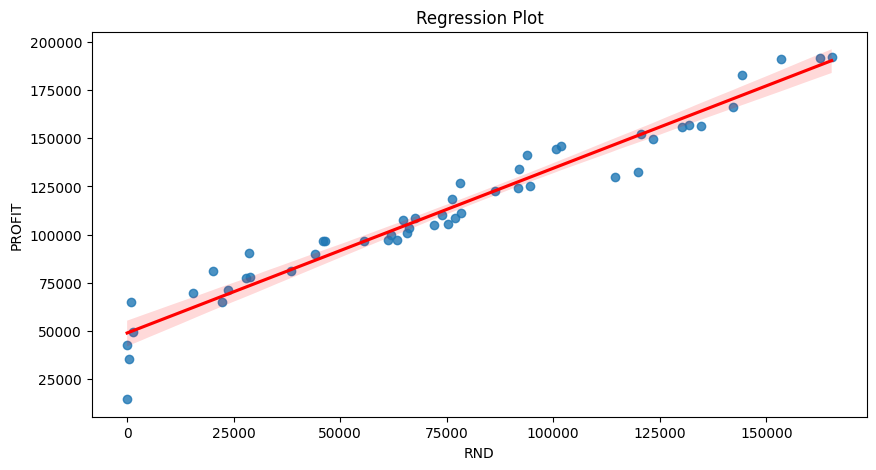

In [25]:
plt.figure(figsize = (10, 5))
sns.regplot(data = df ,x='RND',y='PROFIT', line_kws={'color':'red'})
plt.title('Regression Plot')
plt.show()

predicting out of sample data

In [26]:
rnd = [[110000]]
profit_est = model.predict(rnd)[0][0]
print(f'Estimated profit is : {profit_est:.2f}')

Estimated profit is : 143004.95
